In [62]:
# db 접속 
# 우선 db 접속 후 원시 데이터 받기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import DB_PASS
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler

# PostgreSQL 데이터베이스 연결 설정
username = 'psh0826'  # 사용자 이름
password = DB_PASS  # 비밀번호
host = 'localhost'  # 데이터베이스 서버 주소
port = '5432'  # 포트 번호
dbname = 'youtube_videos'  # 데이터베이스 이름
connection_string = f"postgresql://{username}:{password}@{host}:{port}/{dbname}"

# 데이터베이스 연결 엔진 생성
engine = create_engine(connection_string)

# SQL 쿼리 실행 및 데이터프레임으로 변환
query = "SELECT * FROM video_datas;"

# 데이터를 가져올 테이블명
df = pd.read_sql(query, engine)

# 데이터 확인
# info() 에서 수치형 / 문자열 등을 체크한다.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2391 entries, 0 to 2390
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   video_id      2391 non-null   object        
 1   title         2391 non-null   object        
 2   time          2391 non-null   datetime64[ns]
 3   views         2391 non-null   int64         
 4   likes         2391 non-null   int64         
 5   dislikes      2391 non-null   int64         
 6   comments_cnt  2391 non-null   int64         
 7   comments      2391 non-null   object        
 8   query         2391 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 168.2+ KB
None


In [56]:

# 널값 확인
df.isnull()

# 널값 개수 확인
df.isnull().sum()
print(df.isna().sum())

# isna 는 시리얼 객체에도 적용됨.
df['video_id'].isna()
print(df['video_id'].isna().sum())


video_id        0
title           0
time            0
views           0
likes           0
dislikes        0
comments_cnt    0
comments        0
query           0
dtype: int64
0


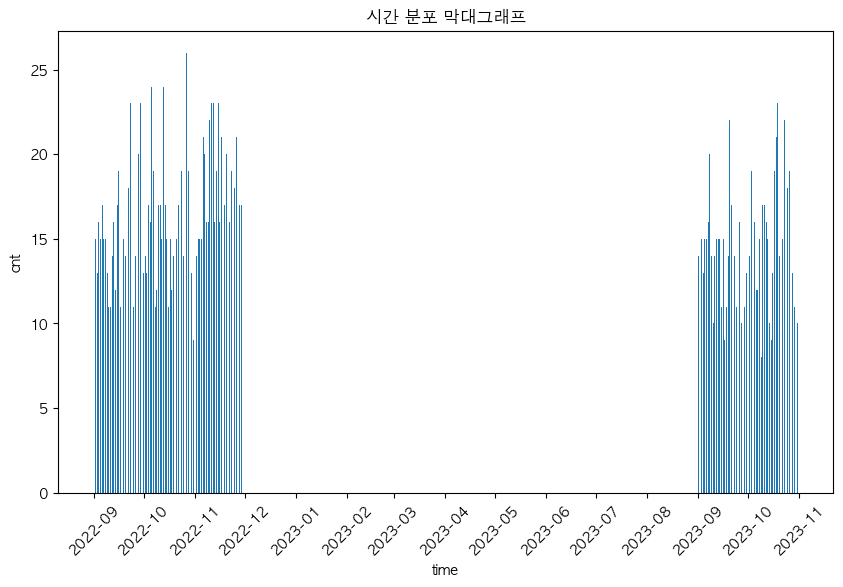

In [50]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 수치형 데이터 조사
df.describe()

# 수치형 데이터 중에서 이산형 데이터가 아니거나, 범위형이거나, 지금 처럼 시간이나 날짜 값인지 확인해본다.
# time 컬럼 데이터 확인
# print(df['time'])

# 정렬
# df['time'].dtypes
# print(pd.to_datetime(df['time'])) # 필요하면 날짜타입으로 바꾸고
# df['time'].sort_values()
# 이걸로 정렬이 안되면 밑에서 시리즈로 뽑아서 .sort_index()로 정렬해도 됨

# 시간대 시각화 

# 날짜를 시간까지만 나오게 하기
# 날짜까지만 분리해서 분포 조사
date_series = df['time'].dt.strftime('%Y-%m-%d')
# print(date_series)

# 시간대별로 데이터 개수 확인
time_series_cnt = date_series.value_counts().sort_index()
# print(time_series_cnt)

# 인덱스(날짜 문자열)를 datetime으로 변환
# 날짜형태로 바꿔줘야 밑에 x축 날짜형 포맷터가 작동함
time_series_cnt.index = pd.to_datetime(time_series_cnt.index)

# 막대 그래프
plt.figure(figsize=(10,6))
plt.bar(time_series_cnt.index, time_series_cnt.values, width = 0.5)

# x축 설정 (만약 막대 그래프를 더 뚱뚱하게 할려면 주별로 집계를 다시 하거나 해서 x축의 범위를 확 줄여야함)
plt.xticks(ticks=time_series_cnt.index, labels=time_series_cnt.index.strftime('%Y-%m'), rotation=45)

plt.xlabel('time')
plt.ylabel('cnt')
plt.title('시간 분포 막대그래프')

# x축 라벨 설정
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # 월별로 로케이터 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # '년-월' 형식으로 포매터 설정

plt.show()

In [55]:
# 위 time 컬럼의 분포를 보면, 22년 9월 부터 11월, 23년 9월 부터 10월까지의 데이터임을 알수있다.
# 이는 처음부터 수집할때 가을 패션 트랜드를 알아보기 위함이었다. 

# 일별로 수집된 비디오 개수를 보면, 
daily_counts = df['time'].dt.to_period('D').value_counts().sort_index()

# 일별 평균 계산
monthly_avg = daily_counts.mean()
print('일 평균 비디오 개수: ', monthly_avg)

# 일별 동영상은 평균 15개 정도 있었다. 




월별 평균 비디오 개수:  15.730263157894736


/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 769 (\N{COMBINING ACUTE ACCENT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10083 (\N{HEAVY HEART EXCLAMATION MARK ORNAMENT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127810 (\N{FALLEN LEAF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/si

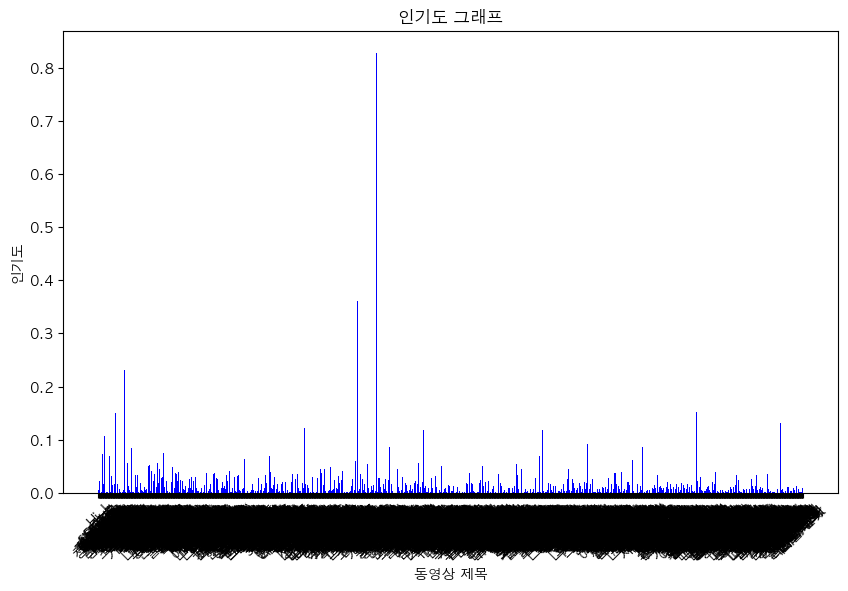

In [68]:
# 가장 인기 많은 동영상 알아보기
# 여기서 인기는 댓글수와 시청자수를 기준으로 한다.

# 좋아요와 댓글수 정규화
scaler = MinMaxScaler()
df['likes_normalized'] = scaler.fit_transform(df[['likes']])
df['comments_cnt_normalized'] = scaler.fit_transform(df[['comments_cnt']])

# 인기도 계산 (정규화된 좋아요와 댓글수의 평균)
df['popularity'] = df[['likes_normalized', 'comments_cnt_normalized']].mean(axis=1)

# 제목길이 조정
titles = df['title'].str[0:5]

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(titles, df['popularity'], color='blue')
plt.xlabel('동영상 제목')
plt.ylabel('인기도')
plt.title('인기도 그래프')
plt.xticks(rotation=45)
plt.show()






In [69]:
# 인기도 top 20 조사
# 인기도를 기준으로 데이터 정렬
top_videos = df.sort_values(by='popularity', ascending=False, ).head(100)

# 상위 100개 동영상의 타이틀 추출
top_titles = top_videos['title']

# 결과 출력
print(top_titles)




868               몸에 스프레이를 뿌리자 10분 만에 완성된 드레스가 있다?
932                    진짜 부자들이 롤렉스 거르는 이유 (ft.메종철)
1238         😇수능이 끝나고 난 뒤 고3들의 모습ㅋㅋㅋㅋㅋㅋㅋㅋ
1084                         지금 사기엔 아깝 vs 지금 사도 괜츊
803                          금수저 연대생 메종철의 천만원짜리 착장
                           ...                    
775         겨울옷 사기전에 보자! 겨울 가장 먼저 사야하는 옷들 [패션우선순위]
43      가을에 이 "4가지"만 있으면 옷 걱정 끝!🍂가을 필수 스타일 [프론트로우]
453         남자라면 하나쯤 있어야할 “역대급” 니트 뽑았다 [콜라보왕EP.11]
165           제2의 전성기 📈 한동안 주춤했다가 최근 다시 떡상한 패션 아이템
714                                 이성이 가장 좋아하는 신발
Name: title, Length: 100, dtype: object


In [71]:
# 인기도 평균 이상치 되는 영상들 제목 다 긁어와서 키워드 분석하기

# 다시 top 100개 구하기
top_videos = df.nlargest(20, 'populrity')

# 상위 20개 동영상의 타이틀 추출
top_titles = top_videos['title']

# 결과 출력
print(top_titles)



KeyError: 'populrity'